In [1]:
using ModelingToolkit, NLsolve
using Plots
using BenchmarkTools

In [2]:
vars = @variables α β Lα Lβ Lαβ Lαγ
ps = @parameters Kdα Kdβ L θ αT γT Kdγ βT

eqs = [0 ~ Lα*Kdα - α*L,
       0 ~ Lβ*Kdβ - β*L,
       0 ~ θ*Kdα*Lαβ - Lβ*α,
       0 ~ α + Lα + Lαβ + Lαγ - αT,
       0 ~ Lα*(γT - Lαγ) - θ*Kdγ*Lαγ,
       0 ~ β + Lβ + Lαβ - βT,
       0 ~ Lα*β - θ*Kdβ*Lαβ]

ns = NonlinearSystem(eqs, collect(vars), collect(ps))
nlsys_func = generate_function(ns);
nlsys_jac = generate_jacobian(ns);

In [14]:
nl_f = @eval eval(nlsys_func[2])
nl_j = @eval eval(nlsys_jac[2])

function ligOut(Lin)
    ps = (1.0, 1.0, Lin, 1.0, 10.0, 10.0, 0.1, 0.0)
    f2 = (du, u) -> nl_f(du, u, ps)
    j2 = (du, u) -> nl_j(du, u, ps)

    res = nlsolve(f2, j2, 0.1ones(6), method = :newton, xtol = 1e-12, ftol = 1e-12)
    @assert res.x_converged | res.f_converged
    println(res)
    return res.zero[6]
end

ligOut(1.0)

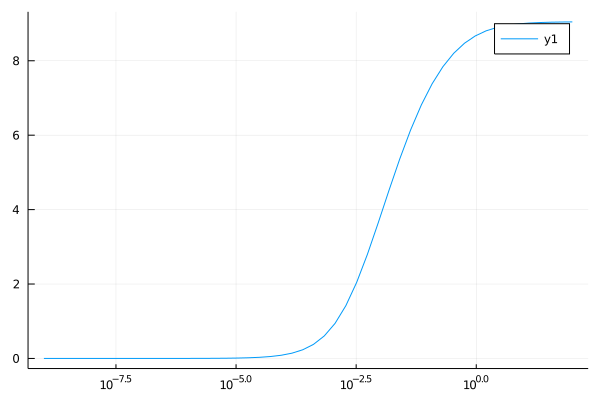

In [4]:
Ls = 10.0 .^ range(-9, 2, length=50)

outts = [ligOut(ii) for ii in Ls];

plot(Ls, outts, xaxis = :log)